# Intro

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Enterprise Data Science Group Project/airplane_train_processed_normalized.csv')
#df is used fro training

In [ ]:
df.head(5)

Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0         6.133398                    3.258097                  2.944439   
1         5.463832                    0.693147                  1.945910   
2         7.041412                    0.000000                  0.000000   
3         6.333280                    2.484907                  2.302585   
4         5.370638                    0.000000                  0.000000   

   Gender_Female  Gender_Male  Customer Type_Loyal Customer  \
0            0.0          1.0                           1.0   
1            0.0          1.0                           0.0   
2            1.0          0.0                           1.0   
3            1.0          0.0                           1.0   
4            0.0          1.0                           1.0   

   Customer Type_disloyal Customer  Type of Travel_Business travel  \
0                              0.0                             0.0   
1                              1.0                             1.0   
2                              0.0                             1.0   
3                              0.0                             1.0   
4                              0.0                             1.0   

   Type of Travel_Personal Travel  Class_Business  ...  Online boarding  \
0                             1.0             0.0  ...              3.0   
1                             0.0             1.0  ...              3.0   
2                             0.0             1.0  ...              5.0   
3                             0.0             1.0  ...              2.0   
4                             0.0             1.0  ...              5.0   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0           5.0                     5.0               4.0               3.0   
1           1.0                     1.0               1.0               5.0   
2           5.0                     5.0               4.0               3.0   
3           2.0                     2.0               2.0               5.0   
4           5.0                     3.0               3.0               4.0   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0               4.0              4.0               5.0          5.0   
1               3.0              1.0               4.0          1.0   
2               4.0              4.0               4.0          5.0   
3               3.0              1.0               4.0          2.0   
4               4.0              3.0               3.0          3.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 28 columns]

In [ ]:
df.columns

Index(['Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'Age',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [ ]:
#Removing the highly correlated columns like 'cat__Gender_Male','cat__Customer Type_disloyal Customer','cat__Type of Travel_Personal Travel','cat__Class_Eco',
df = df[['Gender_Female', 'Customer Type_Loyal Customer',
       'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business',
       'Class_Eco', 'Age',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location',
       'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness',
       'satisfaction']]

In [ ]:
X_train = df[['Gender_Female', 'Customer Type_Loyal Customer',
       'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business',
       'Class_Eco', 'Age',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location',
       'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness'
      ]]
y_train = df['satisfaction'].values

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/Enterprise Data Science Group Project/airplane_test_processed_normalized.csv')
#df_val  is used for testing

In [ ]:
df_val.columns

Index(['Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'Age',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [ ]:
X_test = df_val[['Gender_Female', 'Customer Type_Loyal Customer',
       'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business',
       'Class_Eco', 'Age',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location',
       'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness']]

y_test = df_val['satisfaction'].values

In [ ]:
unique_categories, category_counts = np.unique(y_train, return_counts=True)
np.unique(y_train, return_counts=True)


(array(['neutral or dissatisfied', 'satisfied'], dtype=object),
 array([58226, 44599]))

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
model = lr.fit(X_train,y_train)

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_test_pred)

0.8781888882342545

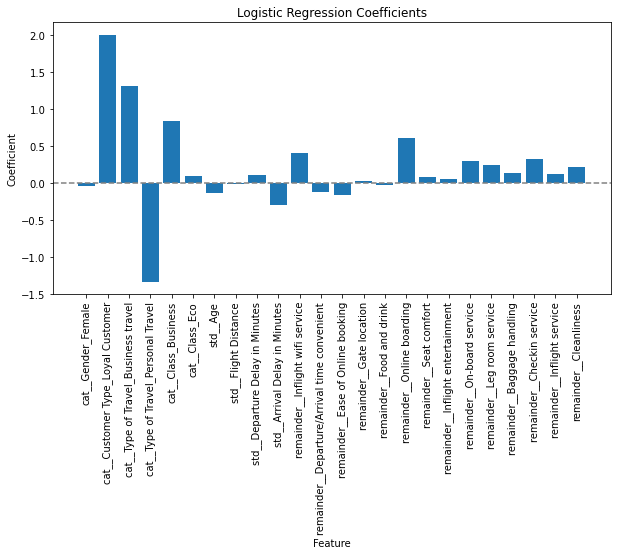

In [ ]:
# assume model is a fitted logistic regression model
coefs = model.coef_.ravel()
feature_names = X_train.columns

# create a bar chart of coefficients
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(feature_names, coefs)
ax.axhline(y=0, color='gray', linestyle='--')
ax.set_xlabel('Feature')
ax.set_ylabel('Coefficient')
ax.set_title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 257.44, 'Predicted label')

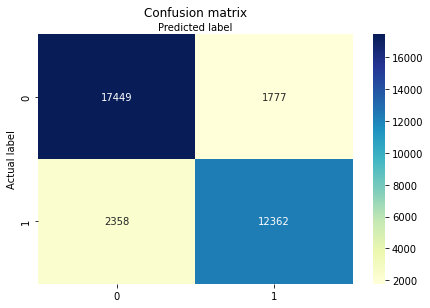

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
class_names=['neutral or dissatisfied','satisfied'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Assuming y_test is the true labels for X_test
precision = precision_score(y_test, y_test_pred,pos_label='satisfied')
recall = recall_score(y_test, y_test_pred,pos_label='satisfied')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8743192587877502
Recall: 0.8398097826086957


The model has  good precision and recall.

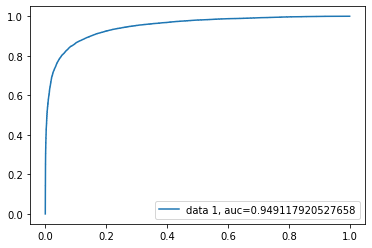

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='satisfied')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(C=0.1, gamma=0.1)

In [ ]:
svc_model.fit(X_train,y_train)

SVC(C=0.1, gamma=0.1)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[17449  1777]
 [ 2358 12362]]


                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.91      0.89     19226
              satisfied       0.87      0.84      0.86     14720

               accuracy                           0.88     33946
              macro avg       0.88      0.87      0.88     33946
           weighted avg       0.88      0.88      0.88     33946



In [ ]:
metrics.accuracy_score(y_test, predictions)

0.8781888882342545

Text(0.5, 257.44, 'Predicted label')

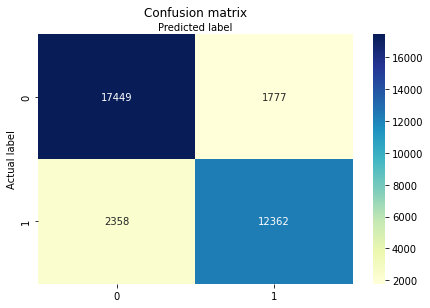

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
class_names=['neutral or dissatisfied','satisfied'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.588 total time=20.4min
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.587 total time=20.0min
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.587 total time=20.4min
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.587 total time=20.1min
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.586 total time=20.1min
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.937 total time= 4.1min
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time= 4.0min
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.936 total time= 4.1min
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time= 4.1min
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.943 total time= 4.2min
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.929 total time= 3.0min
[CV 2/5] END .................C=0.1, gamma=0.01;

K- Nearest Neighbors

Searching for the best parameters for the KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


In [ ]:
grid.best_params_

{'n_neighbors': 9}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 9733  4840]
 [ 1249 10154]]


                         precision    recall  f1-score   support

neutral or dissatisfied       0.89      0.67      0.76     14573
              satisfied       0.68      0.89      0.77     11403

               accuracy                           0.77     25976
              macro avg       0.78      0.78      0.77     25976
           weighted avg       0.79      0.77      0.77     25976



## Using non-normalized dataset for tree based models

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Enterprise Data Science Group Project/airplane_train_processed.csv')

In [ ]:
X = df[['Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'Age',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']]
y = df['satisfaction'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/Enterprise Data Science Group Project/airplane_test_processed.csv')

In [ ]:
X_val = df_val[['Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'Age',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']]

y_val = df_val['satisfaction'].values


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=15)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [ ]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_val, y=y_val)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9331690698627284 {'max_depth': 11}


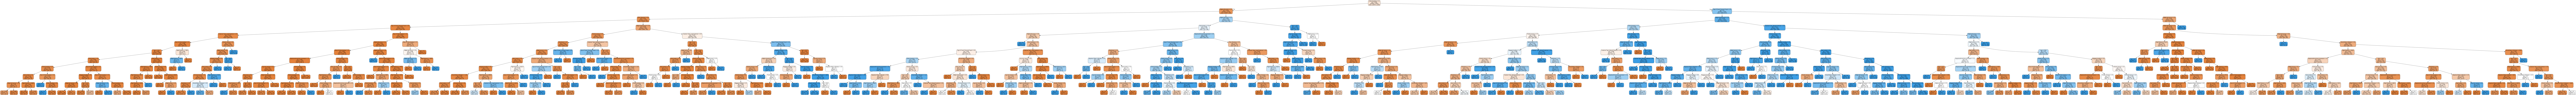

In [ ]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw
import graphviz  
from sklearn.tree import export_graphviz

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = export_graphviz(tree_model, out_file=f, max_depth = clf.best_params_['max_depth'],
                         impurity = True, feature_names = X_val.columns,
                         rounded = True, filled= True )
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree.png'])
# Annotating chart with PIL
img = Image.open("tree.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [ ]:
tree_model.score(X_test, y_test)

0.9348421890195385

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


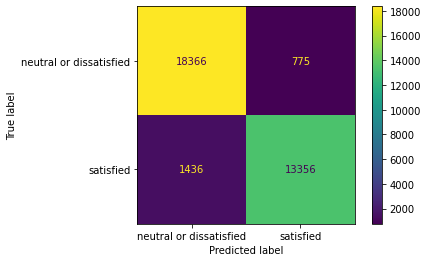

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree_model,X_test,y_test)

**Conclusions**

Accuracy in train dataset - 0.9332 

Best accuracy with 'max_depth': 11

Accuracy in test dataset - 0.9348

# Random forest

In [ ]:
def search_param(model, param, X_train, y_train, X_val, y_val, area=range(1, 11), msg=True, plot=True, seed=None):
    import matplotlib.pyplot as plt
    import time
    score_list = []
    if msg:
        print('#     accuracy  time')
    for i in area:
        start = time.time()
        rfc = eval(model + '(' + param + '=' + str(i) + ', random_state=' + str(seed) + ')')
        rfc.fit(X_train, y_train)
        s = rfc.score(X_val, y_val)
        end = time.time()
        score_list.append(s)
        if msg:
            print("%-3d %10f  %7f" % (i, s, end - start))
    if plot:
        plt.plot(list(area), score_list)
    return list(area)[score_list.index(max(score_list))]

#     accuracy  time
1     0.911803  0.728453
2     0.918656  1.074952
3     0.935479  0.810253
4     0.937866  0.982472
5     0.942947  1.747750
6     0.944487  0.773638
7     0.946374  0.842811
8     0.947336  1.113134
9     0.948106  5.202228
10    0.948298  2.921263
11    0.948876  1.179594
12    0.949415  1.317736
13    0.950454  1.426421
14    0.951571  1.441196
15    0.950839  1.619412
16    0.951455  2.053921
17    0.951686  2.687786
18    0.952572  2.201299
19    0.952225  1.869475
20    0.952187  2.073062
21    0.952610  2.118034
22    0.952572  2.182849
23    0.952610  3.235213
24    0.952995  2.845044
25    0.953342  2.537132
26    0.953419  2.565909
27    0.953111  2.821534
28    0.953149  3.777846
29    0.953265  3.276634
30    0.953534  3.047738
31    0.953342  3.027440
32    0.953226  4.016866
33    0.953265  3.783279
34    0.953342  3.306636
35    0.953342  3.401772
36    0.953496  4.607100
37    0.953688  3.989424
38    0.953996  3.867084
39    0.954073  4.450620
40  

50

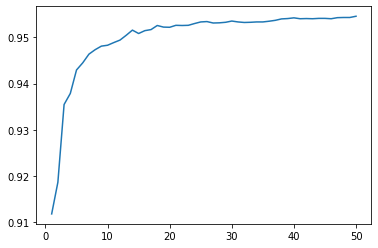

In [ ]:
search_param('RandomForestClassifier', 'n_estimators', X_train, y_train, X_val, y_val, area=range(1, 51), seed=15)

#     accuracy  time
1     0.835348  2.529681
2     0.872074  2.504076
3     0.901871  3.967503
4     0.911880  5.771020
5     0.916923  4.850483
6     0.920542  4.824595
7     0.923737  6.659604
8     0.927510  6.037626
9     0.933015  7.710743
10    0.938174  6.780246
11    0.942408  8.564420
12    0.944949  10.000104
13    0.948568  8.870378
14    0.951032  9.617079
15    0.952071  8.584913
16    0.953419  10.737851
17    0.953957  10.521562
18    0.954381  10.112829
19    0.954766  9.711133
20    0.954689  10.686371
21    0.954265  10.746947
22    0.954535  9.491613
23    0.954073  10.791686
24    0.954650  10.483620


19

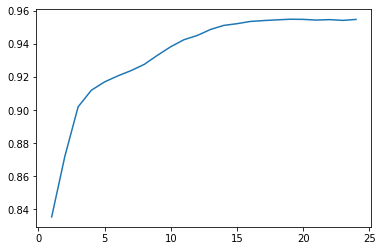

In [ ]:
search_param('RandomForestClassifier', 'max_depth', X_train, y_train, X_val, y_val, range(1, 25), seed=15)

#     accuracy  time
2     0.954535  11.113436
3     0.954535  9.715923
4     0.954804  10.839362
5     0.954881  10.798520
6     0.954535  10.655692
7     0.954304  9.427914
8     0.953881  10.615377
9     0.953842  10.722894


5

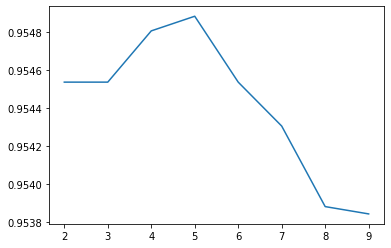

In [ ]:
search_param('RandomForestClassifier', 'min_samples_split', X_train, y_train, X_val, y_val, range(2, 10), seed=15)

#     accuracy  time
1     0.954535  11.174804
2     0.953650  9.367322
3     0.951725  10.537030
4     0.951609  10.539971
5     0.950108  9.250807
6     0.949299  9.277435
7     0.947721  10.122754
8     0.947374  9.289699
9     0.947336  9.361882


1

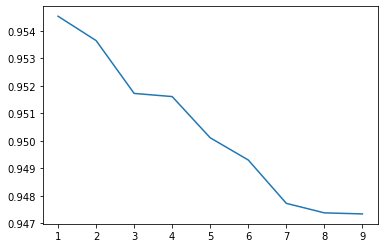

In [ ]:
search_param('RandomForestClassifier', 'min_samples_leaf', X_train, y_train, X_val, y_val, range(1, 10), seed=15)

**Cross validation**

In [ ]:
rfc = RandomForestClassifier(random_state=15)
param = {'n_estimators': [i for i in range(38, 51)], 'max_depth': [i for i in range(20, 25)]}
gscv =  GridSearchCV(rfc, param, cv=3, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 65 candidates, totalling 195 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'max_depth': [20, 21, 22, 23, 24],
                         'n_estimators': [38, 39, 40, 41, 42, 43, 44, 45, 46,
                                          47, 48, 49, 50]},
             verbose=1)

In [ ]:
gscv.best_params_

{'max_depth': 21, 'n_estimators': 50}

**Visualization of the importance of features**

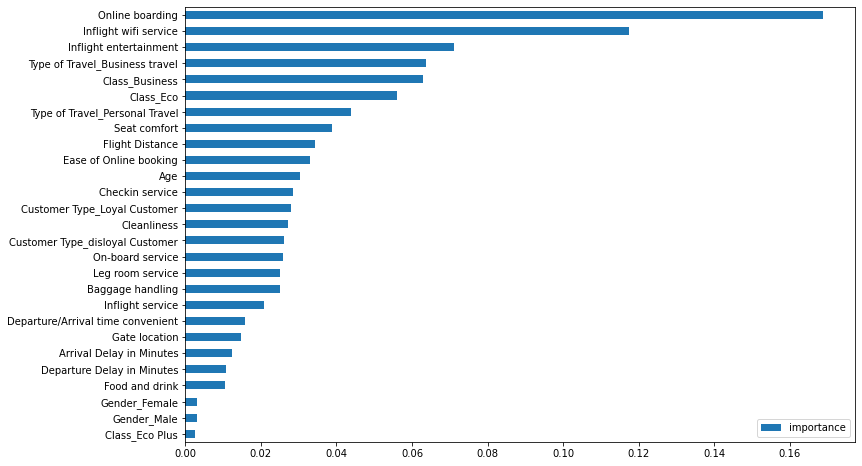

In [ ]:
best_c = gscv.best_estimator_
imp = pd.DataFrame(best_c.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
best_c.score(X_test, y_test)

0.953084018507058

The plot displays the relationship between the True Positive Rate (TPR) and the False Positive Rate (FPR) of the model.

Random Forest Classifier: ROC AUC=0.991


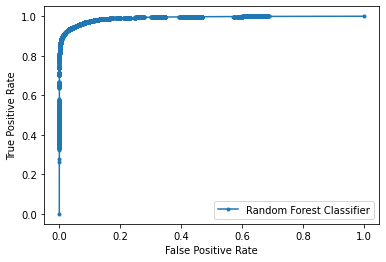

In [ ]:
from sklearn.metrics import roc_auc_score , roc_curve
import matplotlib.pyplot as plt
dtc_proba=best_c.predict_proba(X_test)
dtc_proba=dtc_proba[:,1]
auc=roc_auc_score(y_test, dtc_proba)
print('Random Forest Classifier: ROC AUC=%.3f' % (auc))
lr_fpr, lr_tpr, _ = roc_curve([0 if y_test[i] == "neutral or dissatisfied" else 1 for i in range(len(y_test))], dtc_proba)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Interpretation**

Best accuracy is acaheived with the following parameters

max_depth: 21

n_estimators: 50

The best classification score is  0.991

In this case, the AUC score for the Random Forest Classifier model is printed as 0.993, which indicates that the model is performing well. The ROC curve is shown in the plot, and it seems to be above the diagonal line, indicating that the model is better than random. The curve is closer to the ideal curve, which suggests that the model is doing a good job of classifying the positive and negative instances.

**Important features are**

1.   Online boarding
2.   Inflight wifi service
3.   Inflight entertainment
4.   Type of Travel_Business travel
5.   Class_Business	



# XGBoost

**Without hyperparameter tuning**

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 21,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=21)

In [ ]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=21)


In [ ]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [ ]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9559


In [ ]:
y_num = []
y_num = [0 if y[i] == "neutral or dissatisfied" else 1 for i in range(len(y))]

**hyperparameters tuning**

In [ ]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 51, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
import xgboost as xgb
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_val, y_val)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.9008929360799222
SCORE:
0.8879556773642178
SCORE:
0.9045471959449504
SCORE:
0.8878967376889754
SCORE:
0.8992720950107564
SCORE:
0.9025432469867091
SCORE:
0.9021011994223912
SCORE:
0.899949901276044
SCORE:
0.9028084755252999
SCORE:
0.9027495358500575
SCORE:
0.9055197005864498
SCORE:
0.9028084755252999
SCORE:
0.9028379453629211
SCORE:
0.9008045265670586
SCORE:
0.9064332655527068
SCORE:
0.9065216750655704
SCORE:
0.8879262075265966
SCORE:
0.9013939233194825
SCORE:
0.9005098281908467
SCORE:
0.8994194441988624
SCORE:
0.9053723513983438
SCORE:
0.9037515103291781
SCORE:
0.9057554592874193
SCORE:
0.9044587864320868
SCORE:
0.9031915834143753
SCORE:
0.9058733386379041
SCORE:
0.9042819674063596
SCORE:
0.9035157516282085
SCORE:
0.9056081100993133
SCORE:
0.9013055138066189
SCORE:
0.9044293165944656
SCORE:
0.9039577991925265
SCORE:
0.9064037957150856
SCORE:
0.9013349836442401
SCORE:
0.9019538502342852
SCORE:
0.9033094627648601
SCORE:
0.905254472047859
SCORE:
0.9026021866619515
SCORE:
0.90498

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6911920435612005, 'gamma': 8.593324118055857, 'max_depth': 37.0, 'min_child_weight': 9.0, 'reg_alpha': 72.0, 'reg_lambda': 0.7966579413290078}


In [ ]:
params = {'colsample_bytree': 0.6911920435612005, 'gamma': 8.593324118055857, 'max_depth': 37, 'min_child_weight': 9.0, 'reg_alpha': 72.0, 'reg_lambda': 0.7966579413290078}

In [ ]:
clf = xgb.XGBClassifier(n_estimators=1000, max_depth=int(params['max_depth']), gamma=params['gamma'],
                        reg_alpha=params['reg_alpha'], min_child_weight=params['min_child_weight'],
                        colsample_bytree=params['colsample_bytree'])
    
evaluation = [( X_train, y_train), ( X_test, y_test)]
    
clf.fit(X_train, y_train)
    

best_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,best_pred)

In [ ]:
accuracy

0.9504317331211505

In [ ]:
# import XGBoost
import xgboost as xgb

# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y_num)

In [ ]:
from xgboost import cv

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.949345       0.000948       0.949113      0.000539
1        0.962451       0.003732       0.962114      0.002409
2        0.967715       0.000610       0.967142      0.001479
3        0.968647       0.001584       0.968180      0.002197
4        0.970485       0.001657       0.969982      0.001251

**Feature importance**

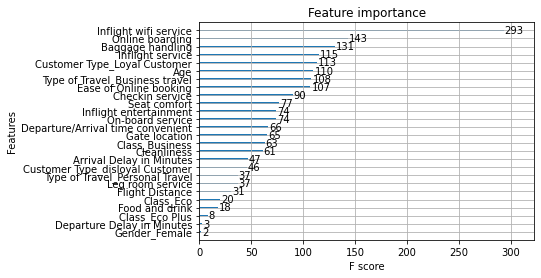

In [ ]:
xgb.plot_importance(clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
print(classification_report(y_test,best_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.98      0.96     19141
              satisfied       0.97      0.92      0.94     14792

               accuracy                           0.95     33933
              macro avg       0.95      0.95      0.95     33933
           weighted avg       0.95      0.95      0.95     33933



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


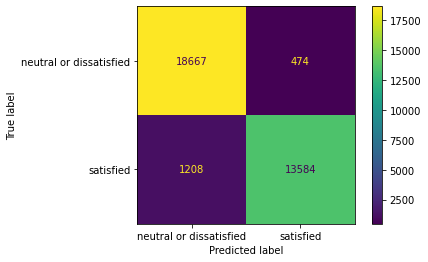

In [ ]:
plot_confusion_matrix(clf,X_test,y_test)


**Interpretation**

Best parameters:

colsample_bytree: 0.691

gamma:  8.593

max_depth' 37.0

min_child_weight: 9.0

reg_alpha': 72.0

reg_lambda: 0.797

Accuacy using the best parameters - 0.95

**Top 5 important features**

1.   Inflight wifi service
2.   Online boarding
3.   Baggage Handling
4.   Inflight Service
5.   LoyalCustomer

